<a href="https://colab.research.google.com/github/dgalian/FTW_B7/blob/main/Capstone/Capstone_MBA_Diagnosis_icdcategorycode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Using Market Basket Analysis to determine the typical combinations of ICD Categories per Claim**

# Import libraries and load dataset

In [357]:
# Importing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [358]:
# Load claims breakdown by diagnosis
clm_icd = pd.read_csv('/content/CLM Breakdown csv.csv')

In [359]:
# Load ICD table to get ICD category
icd_table = pd.read_excel('/content/icd_table.xlsx')

# Data Prep
Profiling, Cleaning

In [360]:
clm_icd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382438 entries, 0 to 382437
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   cbdcode        382438 non-null  int64  
 1   claimcode      382438 non-null  int64  
 2   icdno          382438 non-null  int64  
 3   doctorcode     382438 non-null  int64  
 4   cptno          382438 non-null  int64  
 5   sacode         382438 non-null  int64  
 6   UNIT AMT       382438 non-null  float64
 7   QTY            382438 non-null  float64
 8   INCURRED AMT   382438 non-null  float64
 9   HOSP BILL AMT  382438 non-null  float64
 10  COVERED AMT    382438 non-null  float64
 11  BILL TO        382438 non-null  object 
dtypes: float64(5), int64(6), object(1)
memory usage: 35.0+ MB


In [361]:
# Check number of claims
clm_icd['claimcode'].nunique()

166993

In [362]:
icd_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4343 entries, 0 to 4342
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   icdno        4343 non-null   int64 
 1   icdcategory  4343 non-null   int64 
 2   icdgroup     4343 non-null   int64 
 3   ICD CODE     4343 non-null   object
 4   ICD DISEASE  4343 non-null   object
dtypes: int64(3), object(2)
memory usage: 169.8+ KB


In [363]:
# Creating basket of claims by merging claims table and icd category table
claims = pd.merge(clm_icd, icd_table, on='icdno', how='left')

In [364]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382438 entries, 0 to 382437
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   cbdcode        382438 non-null  int64  
 1   claimcode      382438 non-null  int64  
 2   icdno          382438 non-null  int64  
 3   doctorcode     382438 non-null  int64  
 4   cptno          382438 non-null  int64  
 5   sacode         382438 non-null  int64  
 6   UNIT AMT       382438 non-null  float64
 7   QTY            382438 non-null  float64
 8   INCURRED AMT   382438 non-null  float64
 9   HOSP BILL AMT  382438 non-null  float64
 10  COVERED AMT    382438 non-null  float64
 11  BILL TO        382438 non-null  object 
 12  icdcategory    382355 non-null  float64
 13  icdgroup       382355 non-null  float64
 14  ICD CODE       382355 non-null  object 
 15  ICD DISEASE    382355 non-null  object 
dtypes: float64(7), int64(6), object(3)
memory usage: 49.6+ MB


In [365]:
claims.isnull().sum()

cbdcode           0
claimcode         0
icdno             0
doctorcode        0
cptno             0
sacode            0
UNIT AMT          0
QTY               0
INCURRED AMT      0
HOSP BILL AMT     0
COVERED AMT       0
BILL TO           0
icdcategory      83
icdgroup         83
ICD CODE         83
ICD DISEASE      83
dtype: int64

In [366]:
null_icd = claims[claims['icdcategory'].isnull()]
null_icd['claimcode'].nunique()

46

**46 claims do not have an ICD category**

In [367]:
# Drop null values
claims = claims.dropna()
claims.isnull().sum()

cbdcode          0
claimcode        0
icdno            0
doctorcode       0
cptno            0
sacode           0
UNIT AMT         0
QTY              0
INCURRED AMT     0
HOSP BILL AMT    0
COVERED AMT      0
BILL TO          0
icdcategory      0
icdgroup         0
ICD CODE         0
ICD DISEASE      0
dtype: int64

In [368]:
# Convert Claim code and ICD Category into categorical data
claims['claimcode'] = claims['claimcode'].astype(str)
claims['icdcategory'] = claims['icdcategory'].astype(int).astype(str)
claims['sacode'] = claims['sacode'].astype(int).astype(str)

In [369]:
# Drop other columns
claims = claims[['claimcode','icdno','icdcategory','ICD CODE','ICD DISEASE','sacode']]
claims.head()

,claimcode,icdno,icdcategory,ICD CODE,ICD DISEASE,sacode
0,203746,6127,84,G90.0,Idiopathic peripheral autonomic neuropathy,3718
1,203913,40054,261,W55,Contact with other mammals,3747
2,203913,40054,261,W55,Contact with other mammals,3750
3,203913,40054,261,W55,Contact with other mammals,3953
4,203913,40054,261,W55,Contact with other mammals,3954


In [370]:
# Check claim with duplicate ICD category 
claims[claims['claimcode']=='203913']

,claimcode,icdno,icdcategory,ICD CODE,ICD DISEASE,sacode
1,203913,40054,261,W55,Contact with other mammals,3747
2,203913,40054,261,W55,Contact with other mammals,3750
3,203913,40054,261,W55,Contact with other mammals,3953
4,203913,40054,261,W55,Contact with other mammals,3954
5,203913,40054,261,W55,Contact with other mammals,3843
6,203913,40054,261,W55,Contact with other mammals,3726


In [371]:
# Check number of unique ICD categories in claims
claims['icdcategory'].nunique()

241

In [372]:
241/290

0.8310344827586207

**241 out of 290 or 83% of ICD categories are present in the claims.**

In [ ]:
# Removing duplicate ICD categories in claims, since we are only looking at the occurance of the ICD category per claim
claims['claims_icd'] = claims[['claimcode', 'icdcategory']].agg('_'.join, axis=1)
claims_icd = claims.drop_duplicates(subset='claims_icd')

In [ ]:
claims['icdcategory'].nunique()

In [ ]:
claims_icd[claims_icd['icdcategory']=='0']

In [ ]:
# Dropping ICD Category 0
claims_icd = claims_icd[claims_icd.icdcategory != '0']
claims_icd[claims_icd['icdcategory']=='0']

In [ ]:
# Checking number of ICD categories per claim
claims_icd['claimcode'].value_counts().sort_values(ascending=False)

In [ ]:
claims_icd[claims_icd['claimcode']=='328555']

In [379]:
# Considering only claims with 2 or more ICD categories
claims_icdcombo = claims_icd.groupby('claimcode').filter(lambda x : x['claimcode'].shape[0]>1)
claims_icdcombo['claimcode'].value_counts().sum()

37304

In [380]:
claims_icdcombo.head()

,claimcode,icdno,icdcategory,ICD CODE,ICD DISEASE,sacode,claims_icd
7815,220945,11745,113,J18.9,"Pneumonia, unspecified organism",1196,220945_113
7822,220945,21009,169,N39.0,"Urinary tract infection, site not specified",3812,220945_169
7828,220946,76619,104,I10.9,Essential Hypertension; malignant hypertension,3952,220946_104
7829,220946,3857,54,E11,Type 2 diabetes mellitus,4020,220946_54
7831,220946,11745,113,J18.9,"Pneumonia, unspecified organism",3712,220946_113


In [381]:
37304/166993

0.22338660901953974

**37,304 out of 166,993 or 22% of the claims has 2 or more ICD categories.**

# Preparing Transaction List

In [382]:
# Load ICD table to get ICD category
icd_desc = pd.read_csv('/content/icd_category_categorydes.csv')

# Convert icdcategory  into categorical data
icd_desc['icdcategory'] = icd_desc['icdcategory'].astype(int).astype(str)

# Merge the claims breakdown and idc category description table
claims_icdcombo = pd.merge(claims_icdcombo, icd_desc, on='icdcategory', how='left')
claims_icdcombo.head()

,claimcode,icdno,icdcategory,ICD CODE,ICD DISEASE,sacode,claims_icd,ICD CATEGORY
0,220945,11745,113,J18.9,"Pneumonia, unspecified organism",1196,220945_113,Influenza and pneumonia (J09-J18)
1,220945,21009,169,N39.0,"Urinary tract infection, site not specified",3812,220945_169,Other diseases of the urinary system (N30-N39)
2,220946,76619,104,I10.9,Essential Hypertension; malignant hypertension,3952,220946_104,Hypertensive diseases (I10-I15)
3,220946,3857,54,E11,Type 2 diabetes mellitus,4020,220946_54,Diabetes mellitus (E08-E13)
4,220946,11745,113,J18.9,"Pneumonia, unspecified organism",3712,220946_113,Influenza and pneumonia (J09-J18)


In [383]:
# Get list ICD Categories by Claim number
transactions = claims_icdcombo.groupby('claimcode').agg(lambda col: ','.join(col)).reset_index()
transactions.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


,claimcode,icdcategory,ICD CODE,ICD DISEASE,sacode,claims_icd,ICD CATEGORY
0,220945,"113,169","J18.9,N39.0","Pneumonia, unspecified organism,Urinary tract ...","1196,3812","220945_113,220945_169","Influenza and pneumonia (J09-J18),Other diseas..."
1,220946,"104,54,113","I10.9,E11,J18.9",Essential Hypertension; malignant hypertension...,"3952,4020,3712","220946_104,220946_54,220946_113","Hypertensive diseases (I10-I15),Diabetes melli..."
2,230470,"53,54,105","E03.9,E11,I25.0","Hypothyroidism, unspecified,Type 2 diabetes me...","3806,3808,3979","230470_53,230470_54,230470_105","Disorders of thyroid gland (E00-E07),Diabetes ..."
3,232051,"169,53,104","N39.0,E05.9,I11.9","Urinary tract infection, site not specified,Th...","3812,3806,3816","232051_169,232051_53,232051_104",Other diseases of the urinary system (N30-N39)...
4,251715,"54,104","E11,I10.9","Type 2 diabetes mellitus,Essential Hypertensio...","3803,3821","251715_54,251715_104","Diabetes mellitus (E08-E13),Hypertensive disea..."


In [384]:
transactions['icd'] = transactions['icdcategory'].apply(lambda t: t.split(','))
transactions = transactions['icd']
transactions.head()

0        [113, 169]
1    [104, 54, 113]
2     [53, 54, 105]
3    [169, 53, 104]
4         [54, 104]
Name: icd, dtype: object

In [385]:
transaction_list = list(transactions)
transaction_list[:5]

[['113', '169'],
 ['104', '54', '113'],
 ['53', '54', '105'],
 ['169', '53', '104'],
 ['54', '104']]

# One Hot Encoding

In [386]:
# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder

# Instantiate transaction encoder and identify unique items in transactions
encoder = TransactionEncoder().fit(transaction_list)

# One-hot encode transactions
onehot = encoder.transform(transaction_list)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
onehot

,1,10,100,102,103,104,105,106,107,108,...,87,88,89,90,91,93,95,97,98,99
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13873,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13874,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
13875,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13876,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#Frequent Item Sets

In [387]:
# Choose max_len
claims_icdcombo['claimcode'].value_counts().describe()

count    13878.000000
mean         2.687995
std          1.018211
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: claimcode, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Claims')

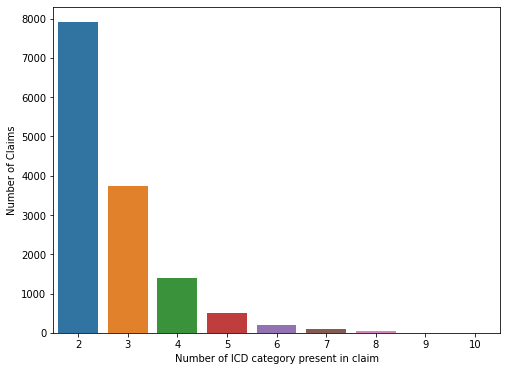

In [388]:
icd_count = pd.DataFrame(claims_icdcombo['claimcode'].value_counts())
plt.figure(figsize=(8,6))
ax = sns.countplot('claimcode', data=icd_count)
ax.set_xlabel('Number of ICD category present in claim')
ax.set_ylabel('Number of Claims')

Text(0, 0.5, 'Number of ICD category present in claim')

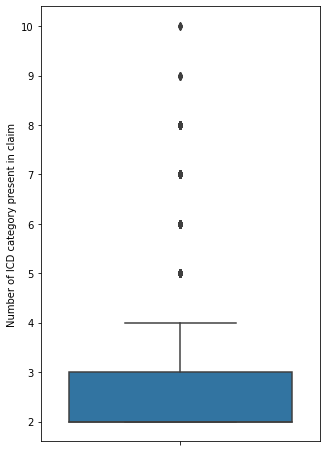

In [389]:
plt.figure(figsize=(5,8))
ax = sns.boxplot(y='claimcode', data=icd_count)
ax.set_ylabel('Number of ICD category present in claim')

We will choose max length of 3.

In [390]:
from mlxtend.frequent_patterns import apriori

# Getting all combinations of item sets
frequent_itemsets = apriori(onehot, 
                            min_support = 0.001, 
                            max_len = 4, 
                            use_colnames = True).sort_values('support',ascending=False)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
82,0.428376,(61),1
3,0.408632,(104),1
77,0.236922,(54),1
78,0.225897,(55),1
150,0.153480,"(104, 61)",2
...,...,...,...
208,0.001009,"(113, 170)",2
674,0.001009,"(277, 61, 54)",3
66,0.001009,(283),1
190,0.001009,"(55, 108)",2


**Min support is 0 for frequent_itemsets**

# Association Rule #1 - Confidence = 0.80

In [391]:
from mlxtend.frequent_patterns import association_rules

rules_1 = association_rules(frequent_itemsets, 
                          metric = "confidence", 
                         	min_threshold = 0.80).sort_values('confidence',ascending=False)
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,"(130, 169, 215)",(61),0.002306,0.428376,0.002162,0.937500,2.188499,0.001174,9.145986
17,"(48, 130, 215)",(61),0.001153,0.428376,0.001081,0.937500,2.188499,0.000587,9.145986
1,"(54, 105, 112)",(61),0.002522,0.428376,0.002306,0.914286,2.134307,0.001225,6.668948
12,"(48, 169, 215)",(61),0.001441,0.428376,0.001297,0.900000,2.100959,0.000680,5.716242
16,"(130, 112, 167)",(61),0.001225,0.428376,0.001081,0.882353,2.059764,0.000556,4.858805
18,"(54, 112, 170)",(130),0.001225,0.149733,0.001081,0.882353,5.892827,0.000897,7.227266
9,"(105, 112, 53)",(54),0.001801,0.236922,0.001585,0.880000,3.714307,0.001158,6.358985
4,"(130, 112, 53)",(54),0.002378,0.236922,0.002090,0.878788,3.709190,0.001526,6.295396
19,"(171, 112)",(54),0.001153,0.236922,0.001009,0.875000,3.693203,0.000736,6.104626
6,"(130, 112, 105)",(54),0.002162,0.236922,0.001873,0.866667,3.658029,0.001361,5.723087


## Antecedents

In [392]:
rules_1_antecedent = rules_1.explode('antecedents').rename_axis('Index')
rules_1_antecedent

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
Index,,,,,,,,,
2,130,(61),0.002306,0.428376,0.002162,0.937500,2.188499,0.001174,9.145986
2,169,(61),0.002306,0.428376,0.002162,0.937500,2.188499,0.001174,9.145986
2,215,(61),0.002306,0.428376,0.002162,0.937500,2.188499,0.001174,9.145986
17,48,(61),0.001153,0.428376,0.001081,0.937500,2.188499,0.000587,9.145986
17,130,(61),0.001153,0.428376,0.001081,0.937500,2.188499,0.000587,9.145986
17,215,(61),0.001153,0.428376,0.001081,0.937500,2.188499,0.000587,9.145986
1,54,(61),0.002522,0.428376,0.002306,0.914286,2.134307,0.001225,6.668948
1,105,(61),0.002522,0.428376,0.002306,0.914286,2.134307,0.001225,6.668948
1,112,(61),0.002522,0.428376,0.002306,0.914286,2.134307,0.001225,6.668948


In [393]:
rules_1_antdesc = pd.merge(rules_1_antecedent, icd_desc, left_on='antecedents', right_on='icdcategory', how='left').set_axis(rules_1_antecedent.index)
rules_1_antdesc.rename(columns={"ICD CATEGORY": "ant_desc"}, inplace=True)
rules_1_antdesc = rules_1_antdesc.drop(columns=['consequents','antecedent support','consequent support','support','lift','confidence','leverage','conviction','icdcategory']).rename_axis('Index').reset_index()
rules_1_antdesc

,Index,antecedents,ant_desc
0,2,130,Diseases of liver (K70-K77)
1,2,169,Other diseases of the urinary system (N30-N39)
2,2,215,"Abnormal findings on examination of blood, wit..."
3,17,48,Aplastic and other anemias and other bone marr...
4,17,130,Diseases of liver (K70-K77)
5,17,215,"Abnormal findings on examination of blood, wit..."
6,1,54,Diabetes mellitus (E08-E13)
7,1,105,Ischemic heart diseases (I20-I25)
8,1,112,Acute upper respiratory infections (J00-J06)
9,12,48,Aplastic and other anemias and other bone marr...


In [394]:
# Removing duplicates
rules_1_antdesc['Index'] = rules_1_antdesc['Index'].astype(str)
rules_1_antdesc['index_icd'] = rules_1_antdesc[['Index', 'antecedents']].agg('_'.join, axis=1)
rules_1_antdesc = rules_1_antdesc.drop_duplicates(subset='index_icd')
rules_1_antdesc

,Index,antecedents,ant_desc,index_icd
0,2,130,Diseases of liver (K70-K77),2_130
1,2,169,Other diseases of the urinary system (N30-N39),2_169
2,2,215,"Abnormal findings on examination of blood, wit...",2_215
3,17,48,Aplastic and other anemias and other bone marr...,17_48
4,17,130,Diseases of liver (K70-K77),17_130
5,17,215,"Abnormal findings on examination of blood, wit...",17_215
6,1,54,Diabetes mellitus (E08-E13),1_54
7,1,105,Ischemic heart diseases (I20-I25),1_105
8,1,112,Acute upper respiratory infections (J00-J06),1_112
9,12,48,Aplastic and other anemias and other bone marr...,12_48


In [395]:
rules_1_antdesc = rules_1_antdesc.groupby('Index').agg(lambda col: ','.join(col))
rules_1_antdesc 

,antecedents,ant_desc,index_icd
Index,,,
0,"48,215",Aplastic and other anemias and other bone marr...,"0_48,0_215"
1,"54,105,112","Diabetes mellitus (E08-E13),Ischemic heart dis...","1_54,1_105,1_112"
10,"105,112,53","Ischemic heart diseases (I20-I25),Acute upper ...","10_105,10_112,10_53"
11,"105,112,53","Ischemic heart diseases (I20-I25),Acute upper ...","11_105,11_112,11_53"
12,"48,169,215",Aplastic and other anemias and other bone marr...,"12_48,12_169,12_215"
13,"54,166,130","Diabetes mellitus (E08-E13),Acute kidney failu...","13_54,13_166,13_130"
14,"107,130,54","Other forms of heart disease (I30-I52),Disease...","14_107,14_130,14_54"
15,"54,105,167","Diabetes mellitus (E08-E13),Ischemic heart dis...","15_54,15_105,15_167"
16,"130,112,167","Diseases of liver (K70-K77),Acute upper respir...","16_130,16_112,16_167"


## Consequents

In [396]:
rules_1_consequent = rules_1.explode('consequents').rename_axis('Index')
rules_1_consequent

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
Index,,,,,,,,,
2,"(130, 169, 215)",61,0.002306,0.428376,0.002162,0.937500,2.188499,0.001174,9.145986
17,"(48, 130, 215)",61,0.001153,0.428376,0.001081,0.937500,2.188499,0.000587,9.145986
1,"(54, 105, 112)",61,0.002522,0.428376,0.002306,0.914286,2.134307,0.001225,6.668948
12,"(48, 169, 215)",61,0.001441,0.428376,0.001297,0.900000,2.100959,0.000680,5.716242
16,"(130, 112, 167)",61,0.001225,0.428376,0.001081,0.882353,2.059764,0.000556,4.858805
18,"(54, 112, 170)",130,0.001225,0.149733,0.001081,0.882353,5.892827,0.000897,7.227266
9,"(105, 112, 53)",54,0.001801,0.236922,0.001585,0.880000,3.714307,0.001158,6.358985
4,"(130, 112, 53)",54,0.002378,0.236922,0.002090,0.878788,3.709190,0.001526,6.295396
19,"(171, 112)",54,0.001153,0.236922,0.001009,0.875000,3.693203,0.000736,6.104626


In [397]:
rules_1_condesc = pd.merge(rules_1_consequent, icd_desc, left_on='consequents', right_on='icdcategory', how='left').set_axis(rules_1_consequent.index)
rules_1_condesc.rename(columns={"ICD CATEGORY": "con_desc"}, inplace=True)
rules_1_condesc = rules_1_condesc.drop(columns=['antecedents','antecedent support','consequent support','support','lift','confidence','leverage','conviction','icdcategory']).rename_axis('Index').reset_index()
rules_1_condesc

,Index,consequents,con_desc
0,2,61,Metabolic disorders (E70-E88)
1,17,61,Metabolic disorders (E70-E88)
2,1,61,Metabolic disorders (E70-E88)
3,12,61,Metabolic disorders (E70-E88)
4,16,61,Metabolic disorders (E70-E88)
5,18,130,Diseases of liver (K70-K77)
6,9,54,Diabetes mellitus (E08-E13)
7,4,54,Diabetes mellitus (E08-E13)
8,19,54,Diabetes mellitus (E08-E13)
9,6,54,Diabetes mellitus (E08-E13)


In [398]:
# Removing duplicates
rules_1_condesc['Index'] = rules_1_condesc['Index'].astype(str)
rules_1_condesc['index_icd'] = rules_1_condesc[['Index', 'consequents']].agg('_'.join, axis=1)
rules_1_condesc = rules_1_condesc.drop_duplicates(subset='index_icd')
rules_1_condesc

,Index,consequents,con_desc,index_icd
0,2,61,Metabolic disorders (E70-E88),2_61
1,17,61,Metabolic disorders (E70-E88),17_61
2,1,61,Metabolic disorders (E70-E88),1_61
3,12,61,Metabolic disorders (E70-E88),12_61
4,16,61,Metabolic disorders (E70-E88),16_61
5,18,130,Diseases of liver (K70-K77),18_130
6,9,54,Diabetes mellitus (E08-E13),9_54
7,4,54,Diabetes mellitus (E08-E13),4_54
8,19,54,Diabetes mellitus (E08-E13),19_54
9,6,54,Diabetes mellitus (E08-E13),6_54


In [399]:
rules_1_condesc = rules_1_condesc.groupby('Index').agg(lambda col: ','.join(col))
rules_1_condesc 

,consequents,con_desc,index_icd
Index,,,
0,61,Metabolic disorders (E70-E88),0_61
1,61,Metabolic disorders (E70-E88),1_61
10,61,Metabolic disorders (E70-E88),10_61
11,130,Diseases of liver (K70-K77),11_130
12,61,Metabolic disorders (E70-E88),12_61
13,61,Metabolic disorders (E70-E88),13_61
14,61,Metabolic disorders (E70-E88),14_61
15,61,Metabolic disorders (E70-E88),15_61
16,61,Metabolic disorders (E70-E88),16_61


## Rules

In [400]:
rules_5_desc = pd.merge(rules_5_antdesc,rules_5_condesc,on='Index',how='inner')
rules_5_desc = rules_5_desc.drop(columns=['index_icd_x','index_icd_y'])
rules_5_desc

,antecedents,ant_desc,consequents,con_desc
Index,,,,
1047,42,"Benign neoplasms, except benign neuroendocrine...",171,Disorders of breast (N60-N65)
1193,172,Inflammatory diseases of female pelvic organs ...,173,Noninflammatory disorders of female genital tr...
1344,156,Other soft tissue disorders (M70-M79),224,"Injuries to the abdomen, lower back, lumbar sp..."
1345,224,"Injuries to the abdomen, lower back, lumbar sp...",156,Other soft tissue disorders (M70-M79)
1392,"54,112","Diabetes mellitus (E08-E13),Acute upper respir...","105,61","Ischemic heart diseases (I20-I25),Metabolic di..."
1394,"61,112","Metabolic disorders (E70-E88),Acute upper resp...","54,105","Diabetes mellitus (E08-E13),Ischemic heart dis..."
1625,"54,130,53","Diabetes mellitus (E08-E13),Diseases of liver ...",112,Acute upper respiratory infections (J00-J06)
1629,"54,112","Diabetes mellitus (E08-E13),Acute upper respir...","130,53","Diseases of liver (K70-K77),Disorders of thyro..."
1631,"130,112","Diseases of liver (K70-K77),Acute upper respir...","54,53","Diabetes mellitus (E08-E13),Disorders of thyro..."


# Association Rule #2 - Antecedent Support, Consequent Support, Zhang

## Apriori

**Zhang's rule**

In [401]:
# Define a new zhang's metric function
def zhangs_rule(rules):
	PAB = rules['support'].copy()
	PA = rules['antecedent support'].copy()
	PB = rules['consequent support'].copy()
	NUMERATOR = PAB - PA*PB
	DENOMINATOR = np.max((PAB*(1-PA).values,PA*(PB-PAB).values), axis = 0)
	return NUMERATOR / DENOMINATOR

In [402]:
# Generate the initial set of rules using a minimum lift of 1.00 on frequent_itemsets (all combinations)
rules_2 = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)

# Set antecedent support to 0.01
rules_2 = rules_2[rules_2['antecedent support'] > 0.008]

# Set consequent support to 0.01
rules_2 = rules_2[rules_2['consequent support'] > 0.008]

# Compute Zhang's rule
rules_2['zhang'] = zhangs_rule(rules_2)

# Set the lower bound for Zhang's rule to 0.8
rules_2 = rules_2[rules_2['zhang'] > 0.9].sort_values('zhang',ascending=False)
rules_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
294,(10),(15),0.018158,0.014844,0.004395,0.242063,16.307559,0.004126,1.299787,0.956039
295,(15),(10),0.014844,0.018158,0.004395,0.296117,16.307559,0.004126,1.394892,0.952822
700,(173),(172),0.017222,0.010304,0.002522,0.146444,14.212189,0.002345,1.159497,0.945928
701,(172),(173),0.010304,0.017222,0.002522,0.244755,14.212189,0.002345,1.301272,0.939317
1190,"(130, 105)","(61, 112)",0.014267,0.009511,0.001801,0.126263,13.274793,0.001666,1.133623,0.938053
829,"(54, 105)","(61, 112)",0.020752,0.009511,0.002306,0.111111,11.681818,0.002108,1.114300,0.933775
608,(171),(42),0.027165,0.009728,0.002882,0.106101,10.907162,0.002618,1.107812,0.933681
1187,"(61, 112)","(130, 105)",0.009511,0.014267,0.001801,0.189394,13.274793,0.001666,1.216044,0.933549
1916,(172),(42),0.010304,0.009728,0.001297,0.125874,12.939860,0.001197,1.132872,0.932326
1917,(42),(172),0.009728,0.010304,0.001297,0.133333,12.939860,0.001197,1.141957,0.931783


## Antecedents

In [403]:
rules_2_antecedent = rules_2.explode('antecedents').rename_axis('Index')
rules_2_antecedent

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
Index,,,,,,,,,,
294,10,(15),0.018158,0.014844,0.004395,0.242063,16.307559,0.004126,1.299787,0.956039
295,15,(10),0.014844,0.018158,0.004395,0.296117,16.307559,0.004126,1.394892,0.952822
700,173,(172),0.017222,0.010304,0.002522,0.146444,14.212189,0.002345,1.159497,0.945928
701,172,(173),0.010304,0.017222,0.002522,0.244755,14.212189,0.002345,1.301272,0.939317
1190,130,"(61, 112)",0.014267,0.009511,0.001801,0.126263,13.274793,0.001666,1.133623,0.938053
1190,105,"(61, 112)",0.014267,0.009511,0.001801,0.126263,13.274793,0.001666,1.133623,0.938053
829,54,"(61, 112)",0.020752,0.009511,0.002306,0.111111,11.681818,0.002108,1.114300,0.933775
829,105,"(61, 112)",0.020752,0.009511,0.002306,0.111111,11.681818,0.002108,1.114300,0.933775
608,171,(42),0.027165,0.009728,0.002882,0.106101,10.907162,0.002618,1.107812,0.933681


In [404]:
rules_2_antdesc = pd.merge(rules_2_antecedent, icd_desc, left_on='antecedents', right_on='icdcategory', how='left').set_axis(rules_2_antecedent.index)
rules_2_antdesc.rename(columns={"ICD CATEGORY": "ant_desc"}, inplace=True)
rules_2_antdesc = rules_2_antdesc.drop(columns=['consequents','antecedent support','consequent support','support','lift','confidence','leverage','conviction','zhang','icdcategory']).rename_axis('Index').reset_index()
rules_2_antdesc

,Index,antecedents,ant_desc
0,294,10,Arthropod-borne viral fevers and viral hemorrh...
1,295,15,Other viral diseases (B25-B34)
2,700,173,Noninflammatory disorders of female genital tr...
3,701,172,Inflammatory diseases of female pelvic organs ...
4,1190,130,Diseases of liver (K70-K77)
5,1190,105,Ischemic heart diseases (I20-I25)
6,829,54,Diabetes mellitus (E08-E13)
7,829,105,Ischemic heart diseases (I20-I25)
8,608,171,Disorders of breast (N60-N65)
9,1187,61,Metabolic disorders (E70-E88)


In [405]:
# Removing duplicates
rules_2_antdesc['Index'] = rules_2_antdesc['Index'].astype(str)
rules_2_antdesc['index_icd'] = rules_2_antdesc[['Index', 'antecedents']].agg('_'.join, axis=1)
rules_2_antdesc = rules_2_antdesc.drop_duplicates(subset='index_icd')
rules_2_antdesc

,Index,antecedents,ant_desc,index_icd
0,294,10,Arthropod-borne viral fevers and viral hemorrh...,294_10
1,295,15,Other viral diseases (B25-B34),295_15
2,700,173,Noninflammatory disorders of female genital tr...,700_173
3,701,172,Inflammatory diseases of female pelvic organs ...,701_172
4,1190,130,Diseases of liver (K70-K77),1190_130
5,1190,105,Ischemic heart diseases (I20-I25),1190_105
6,829,54,Diabetes mellitus (E08-E13),829_54
7,829,105,Ischemic heart diseases (I20-I25),829_105
8,608,171,Disorders of breast (N60-N65),608_171
9,1187,61,Metabolic disorders (E70-E88),1187_61


In [406]:
rules_2_antdesc = rules_2_antdesc.groupby('Index').agg(lambda col: ','.join(col))
rules_2_antdesc 

,antecedents,ant_desc,index_icd
Index,,,
1065,"61,112","Metabolic disorders (E70-E88),Acute upper resp...","1065_61,1065_112"
1068,"130,53","Diseases of liver (K70-K77),Disorders of thyro...","1068_130,1068_53"
1187,"61,112","Metabolic disorders (E70-E88),Acute upper resp...","1187_61,1187_112"
1190,"130,105","Diseases of liver (K70-K77),Ischemic heart dis...","1190_130,1190_105"
1623,"61,112","Metabolic disorders (E70-E88),Acute upper resp...","1623_61,1623_112"
1626,"105,53","Ischemic heart diseases (I20-I25),Disorders of...","1626_105,1626_53"
1916,172,Inflammatory diseases of female pelvic organs ...,1916_172
1917,42,"Benign neoplasms, except benign neuroendocrine...",1917_42
294,10,Arthropod-borne viral fevers and viral hemorrh...,294_10


## Consequents

In [407]:
rules_2_consequent = rules_2.explode('consequents').rename_axis('Index')
rules_2_consequent

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
Index,,,,,,,,,,
294,(10),15,0.018158,0.014844,0.004395,0.242063,16.307559,0.004126,1.299787,0.956039
295,(15),10,0.014844,0.018158,0.004395,0.296117,16.307559,0.004126,1.394892,0.952822
700,(173),172,0.017222,0.010304,0.002522,0.146444,14.212189,0.002345,1.159497,0.945928
701,(172),173,0.010304,0.017222,0.002522,0.244755,14.212189,0.002345,1.301272,0.939317
1190,"(130, 105)",61,0.014267,0.009511,0.001801,0.126263,13.274793,0.001666,1.133623,0.938053
1190,"(130, 105)",112,0.014267,0.009511,0.001801,0.126263,13.274793,0.001666,1.133623,0.938053
829,"(54, 105)",61,0.020752,0.009511,0.002306,0.111111,11.681818,0.002108,1.114300,0.933775
829,"(54, 105)",112,0.020752,0.009511,0.002306,0.111111,11.681818,0.002108,1.114300,0.933775
608,(171),42,0.027165,0.009728,0.002882,0.106101,10.907162,0.002618,1.107812,0.933681


In [408]:
rules_2_condesc = pd.merge(rules_2_consequent, icd_desc, left_on='consequents', right_on='icdcategory', how='left').set_axis(rules_2_consequent.index)
rules_2_condesc.rename(columns={"ICD CATEGORY": "con_desc"}, inplace=True)
rules_2_condesc = rules_2_condesc.drop(columns=['antecedents','antecedent support','consequent support','support','lift','confidence','leverage','conviction','zhang','icdcategory']).rename_axis('Index').reset_index()
rules_2_condesc

,Index,consequents,con_desc
0,294,15,Other viral diseases (B25-B34)
1,295,10,Arthropod-borne viral fevers and viral hemorrh...
2,700,172,Inflammatory diseases of female pelvic organs ...
3,701,173,Noninflammatory disorders of female genital tr...
4,1190,61,Metabolic disorders (E70-E88)
5,1190,112,Acute upper respiratory infections (J00-J06)
6,829,61,Metabolic disorders (E70-E88)
7,829,112,Acute upper respiratory infections (J00-J06)
8,608,42,"Benign neoplasms, except benign neuroendocrine..."
9,1187,130,Diseases of liver (K70-K77)


In [409]:
# Removing duplicates
rules_2_condesc['Index'] = rules_2_condesc['Index'].astype(str)
rules_2_condesc['index_icd'] = rules_2_condesc[['Index', 'consequents']].agg('_'.join, axis=1)
rules_2_condesc = rules_2_condesc.drop_duplicates(subset='index_icd')
rules_2_condesc

,Index,consequents,con_desc,index_icd
0,294,15,Other viral diseases (B25-B34),294_15
1,295,10,Arthropod-borne viral fevers and viral hemorrh...,295_10
2,700,172,Inflammatory diseases of female pelvic organs ...,700_172
3,701,173,Noninflammatory disorders of female genital tr...,701_173
4,1190,61,Metabolic disorders (E70-E88),1190_61
5,1190,112,Acute upper respiratory infections (J00-J06),1190_112
6,829,61,Metabolic disorders (E70-E88),829_61
7,829,112,Acute upper respiratory infections (J00-J06),829_112
8,608,42,"Benign neoplasms, except benign neuroendocrine...",608_42
9,1187,130,Diseases of liver (K70-K77),1187_130


In [410]:
rules_2_condesc = rules_2_condesc.groupby('Index').agg(lambda col: ','.join(col))
rules_2_condesc 

,consequents,con_desc,index_icd
Index,,,
1065,"130,53","Diseases of liver (K70-K77),Disorders of thyro...","1065_130,1065_53"
1068,"61,112","Metabolic disorders (E70-E88),Acute upper resp...","1068_61,1068_112"
1187,"130,105","Diseases of liver (K70-K77),Ischemic heart dis...","1187_130,1187_105"
1190,"61,112","Metabolic disorders (E70-E88),Acute upper resp...","1190_61,1190_112"
1623,"105,53","Ischemic heart diseases (I20-I25),Disorders of...","1623_105,1623_53"
1626,"61,112","Metabolic disorders (E70-E88),Acute upper resp...","1626_61,1626_112"
1916,42,"Benign neoplasms, except benign neuroendocrine...",1916_42
1917,172,Inflammatory diseases of female pelvic organs ...,1917_172
294,15,Other viral diseases (B25-B34),294_15


In [411]:
rules_2_desc = pd.merge(rules_2_antdesc,rules_2_condesc,on='Index',how='inner')
rules_2_desc = rules_2_desc.drop(columns=['index_icd_x','index_icd_y'])
rules_2_desc

,antecedents,ant_desc,consequents,con_desc
Index,,,,
1065,"61,112","Metabolic disorders (E70-E88),Acute upper resp...","130,53","Diseases of liver (K70-K77),Disorders of thyro..."
1068,"130,53","Diseases of liver (K70-K77),Disorders of thyro...","61,112","Metabolic disorders (E70-E88),Acute upper resp..."
1187,"61,112","Metabolic disorders (E70-E88),Acute upper resp...","130,105","Diseases of liver (K70-K77),Ischemic heart dis..."
1190,"130,105","Diseases of liver (K70-K77),Ischemic heart dis...","61,112","Metabolic disorders (E70-E88),Acute upper resp..."
1623,"61,112","Metabolic disorders (E70-E88),Acute upper resp...","105,53","Ischemic heart diseases (I20-I25),Disorders of..."
1626,"105,53","Ischemic heart diseases (I20-I25),Disorders of...","61,112","Metabolic disorders (E70-E88),Acute upper resp..."
1916,172,Inflammatory diseases of female pelvic organs ...,42,"Benign neoplasms, except benign neuroendocrine..."
1917,42,"Benign neoplasms, except benign neuroendocrine...",172,Inflammatory diseases of female pelvic organs ...
294,10,Arthropod-borne viral fevers and viral hemorrh...,15,Other viral diseases (B25-B34)


# Association Rule #3 - Zhang = 0.9

In [412]:
# Recover association rules using a minium support threshold of 0.001
rules_3 = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.001)
rules_3['zhang'] = zhangs_rule(rules_3)

# Apply metric thresholds
rules_3 = rules_3[rules_3['zhang'] > 0.90] 

# Print remaining rule
rules_3.sort_values('support',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
610,(10),(15),0.018158,0.014844,0.004395,0.242063,16.307559,0.004126,1.299787,0.956039
611,(15),(10),0.014844,0.018158,0.004395,0.296117,16.307559,0.004126,1.394892,0.952822
1046,(171),(42),0.027165,0.009728,0.002882,0.106101,10.907162,0.002618,1.107812,0.933681
1047,(42),(171),0.009728,0.027165,0.002882,0.296296,10.907162,0.002618,1.382449,0.917240
1176,(130),"(54, 61, 112)",0.149733,0.003747,0.002594,0.017324,4.623603,0.002033,1.013817,0.921733
...,...,...,...,...,...,...,...,...,...,...
4102,"(105, 130)","(170, 53)",0.014267,0.006845,0.001009,0.070707,10.329187,0.000911,1.068721,0.916259
4057,(54),"(171, 112)",0.236922,0.001153,0.001009,0.004258,3.693203,0.000736,1.003118,0.955645
3973,(130),"(61, 112, 170)",0.149733,0.001297,0.001009,0.006737,5.194418,0.000815,1.005477,0.949685
3969,"(130, 61)","(112, 170)",0.084234,0.002090,0.001009,0.011976,5.731158,0.000833,1.010006,0.901448


## Antecedents

In [413]:
rules_3_antecedent = rules_3.explode('antecedents').rename_axis('Index')
rules_3_antecedent

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
Index,,,,,,,,,,
610,10,(15),0.018158,0.014844,0.004395,0.242063,16.307559,0.004126,1.299787,0.956039
611,15,(10),0.014844,0.018158,0.004395,0.296117,16.307559,0.004126,1.394892,0.952822
1046,171,(42),0.027165,0.009728,0.002882,0.106101,10.907162,0.002618,1.107812,0.933681
1047,42,(171),0.009728,0.027165,0.002882,0.296296,10.907162,0.002618,1.382449,0.917240
1176,130,"(54, 61, 112)",0.149733,0.003747,0.002594,0.017324,4.623603,0.002033,1.013817,0.921733
...,...,...,...,...,...,...,...,...,...,...
4116,105,(1),0.006341,0.011529,0.001009,0.159091,13.799148,0.000936,1.175479,0.933451
4116,112,(1),0.006341,0.011529,0.001009,0.159091,13.799148,0.000936,1.175479,0.933451
4117,1,"(105, 112)",0.011529,0.006341,0.001009,0.087500,13.799148,0.000936,1.088941,0.938350


In [414]:
rules_3_antdesc = pd.merge(rules_3_antecedent, icd_desc, left_on='antecedents', right_on='icdcategory', how='left').set_axis(rules_3_antecedent.index)
rules_3_antdesc.rename(columns={"ICD CATEGORY": "ant_desc"}, inplace=True)
rules_3_antdesc = rules_3_antdesc.drop(columns=['consequents','antecedent support','consequent support','support','lift','confidence','leverage','conviction','zhang','icdcategory']).rename_axis('Index').reset_index()
rules_3_antdesc

,Index,antecedents,ant_desc
0,610,10,Arthropod-borne viral fevers and viral hemorrh...
1,611,15,Other viral diseases (B25-B34)
2,1046,171,Disorders of breast (N60-N65)
3,1047,42,"Benign neoplasms, except benign neuroendocrine..."
4,1176,130,Diseases of liver (K70-K77)
...,...,...,...
207,4116,105,Ischemic heart diseases (I20-I25)
208,4116,112,Acute upper respiratory infections (J00-J06)
209,4117,1,Intestinal infectious diseases (A00-A09)
210,4118,105,Ischemic heart diseases (I20-I25)


In [415]:
# Removing duplicates
rules_3_antdesc['Index'] = rules_3_antdesc['Index'].astype(str)
rules_3_antdesc['index_icd'] = rules_3_antdesc[['Index', 'antecedents']].agg('_'.join, axis=1)
rules_3_antdesc = rules_3_antdesc.drop_duplicates(subset='index_icd')
rules_3_antdesc

,Index,antecedents,ant_desc,index_icd
0,610,10,Arthropod-borne viral fevers and viral hemorrh...,610_10
1,611,15,Other viral diseases (B25-B34),611_15
2,1046,171,Disorders of breast (N60-N65),1046_171
3,1047,42,"Benign neoplasms, except benign neuroendocrine...",1047_42
4,1176,130,Diseases of liver (K70-K77),1176_130
...,...,...,...,...
207,4116,105,Ischemic heart diseases (I20-I25),4116_105
208,4116,112,Acute upper respiratory infections (J00-J06),4116_112
209,4117,1,Intestinal infectious diseases (A00-A09),4117_1
210,4118,105,Ischemic heart diseases (I20-I25),4118_105


In [416]:
rules_3_antdesc = rules_3_antdesc.groupby('Index').agg(lambda col: ','.join(col))
rules_3_antdesc 

,antecedents,ant_desc,index_icd
Index,,,
1046,171,Disorders of breast (N60-N65),1046_171
1047,42,"Benign neoplasms, except benign neuroendocrine...",1047_42
1176,130,Diseases of liver (K70-K77),1176_130
1192,173,Noninflammatory disorders of female genital tr...,1192_173
1193,172,Inflammatory diseases of female pelvic organs ...,1193_172
...,...,...,...
4117,1,Intestinal infectious diseases (A00-A09),4117_1
4118,105,Ischemic heart diseases (I20-I25),4118_105
4119,112,Acute upper respiratory infections (J00-J06),4119_112


## Consequents

In [417]:
rules_3_consequent = rules_3.explode('consequents').rename_axis('Index')
rules_3_consequent

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
Index,,,,,,,,,,
610,(10),15,0.018158,0.014844,0.004395,0.242063,16.307559,0.004126,1.299787,0.956039
611,(15),10,0.014844,0.018158,0.004395,0.296117,16.307559,0.004126,1.394892,0.952822
1046,(171),42,0.027165,0.009728,0.002882,0.106101,10.907162,0.002618,1.107812,0.933681
1047,(42),171,0.009728,0.027165,0.002882,0.296296,10.907162,0.002618,1.382449,0.917240
1176,(130),54,0.149733,0.003747,0.002594,0.017324,4.623603,0.002033,1.013817,0.921733
...,...,...,...,...,...,...,...,...,...,...
4117,(1),112,0.011529,0.006341,0.001009,0.087500,13.799148,0.000936,1.088941,0.938350
4118,(105),1,0.099222,0.001369,0.001009,0.010167,7.426213,0.000873,1.008888,0.960660
4118,(105),112,0.099222,0.001369,0.001009,0.010167,7.426213,0.000873,1.008888,0.960660


In [418]:
rules_3_condesc = pd.merge(rules_3_consequent, icd_desc, left_on='consequents', right_on='icdcategory', how='left').set_axis(rules_3_consequent.index)
rules_3_condesc.rename(columns={"ICD CATEGORY": "con_desc"}, inplace=True)
rules_3_condesc = rules_3_condesc.drop(columns=['antecedents','antecedent support','consequent support','support','lift','confidence','leverage','conviction','zhang','icdcategory']).rename_axis('Index').reset_index()
rules_3_condesc

,Index,consequents,con_desc
0,610,15,Other viral diseases (B25-B34)
1,611,10,Arthropod-borne viral fevers and viral hemorrh...
2,1046,42,"Benign neoplasms, except benign neuroendocrine..."
3,1047,171,Disorders of breast (N60-N65)
4,1176,54,Diabetes mellitus (E08-E13)
...,...,...,...
280,4117,112,Acute upper respiratory infections (J00-J06)
281,4118,1,Intestinal infectious diseases (A00-A09)
282,4118,112,Acute upper respiratory infections (J00-J06)
283,4119,1,Intestinal infectious diseases (A00-A09)


In [419]:
# Removing duplicates
rules_3_condesc['Index'] = rules_3_condesc['Index'].astype(str)
rules_3_condesc['index_icd'] = rules_3_condesc[['Index', 'consequents']].agg('_'.join, axis=1)
rules_3_condesc = rules_3_condesc.drop_duplicates(subset='index_icd')
rules_3_condesc

,Index,consequents,con_desc,index_icd
0,610,15,Other viral diseases (B25-B34),610_15
1,611,10,Arthropod-borne viral fevers and viral hemorrh...,611_10
2,1046,42,"Benign neoplasms, except benign neuroendocrine...",1046_42
3,1047,171,Disorders of breast (N60-N65),1047_171
4,1176,54,Diabetes mellitus (E08-E13),1176_54
...,...,...,...,...
280,4117,112,Acute upper respiratory infections (J00-J06),4117_112
281,4118,1,Intestinal infectious diseases (A00-A09),4118_1
282,4118,112,Acute upper respiratory infections (J00-J06),4118_112
283,4119,1,Intestinal infectious diseases (A00-A09),4119_1


In [420]:
rules_3_condesc = rules_3_condesc.groupby('Index').agg(lambda col: ','.join(col))
rules_3_condesc 

,consequents,con_desc,index_icd
Index,,,
1046,42,"Benign neoplasms, except benign neuroendocrine...",1046_42
1047,171,Disorders of breast (N60-N65),1047_171
1176,"54,61,112","Diabetes mellitus (E08-E13),Metabolic disorder...","1176_54,1176_61,1176_112"
1192,172,Inflammatory diseases of female pelvic organs ...,1192_172
1193,173,Noninflammatory disorders of female genital tr...,1193_173
...,...,...,...
4117,"105,112","Ischemic heart diseases (I20-I25),Acute upper ...","4117_105,4117_112"
4118,"1,112","Intestinal infectious diseases (A00-A09),Acute...","4118_1,4118_112"
4119,"1,105","Intestinal infectious diseases (A00-A09),Ische...","4119_1,4119_105"


## Rules

In [421]:
rules_5_desc = pd.merge(rules_5_antdesc,rules_5_condesc,on='Index',how='inner')
rules_5_desc = rules_5_desc.drop(columns=['index_icd_x','index_icd_y'])
rules_5_desc

,antecedents,ant_desc,consequents,con_desc
Index,,,,
1047,42,"Benign neoplasms, except benign neuroendocrine...",171,Disorders of breast (N60-N65)
1193,172,Inflammatory diseases of female pelvic organs ...,173,Noninflammatory disorders of female genital tr...
1344,156,Other soft tissue disorders (M70-M79),224,"Injuries to the abdomen, lower back, lumbar sp..."
1345,224,"Injuries to the abdomen, lower back, lumbar sp...",156,Other soft tissue disorders (M70-M79)
1392,"54,112","Diabetes mellitus (E08-E13),Acute upper respir...","105,61","Ischemic heart diseases (I20-I25),Metabolic di..."
1394,"61,112","Metabolic disorders (E70-E88),Acute upper resp...","54,105","Diabetes mellitus (E08-E13),Ischemic heart dis..."
1625,"54,130,53","Diabetes mellitus (E08-E13),Diseases of liver ...",112,Acute upper respiratory infections (J00-J06)
1629,"54,112","Diabetes mellitus (E08-E13),Acute upper respir...","130,53","Diseases of liver (K70-K77),Disorders of thyro..."
1631,"130,112","Diseases of liver (K70-K77),Acute upper respir...","54,53","Diabetes mellitus (E08-E13),Disorders of thyro..."


# Association Rule #4 - Confidence & Zhang


In [422]:
# Recover association rules using a minium support threshold of 0.001
rules_5 = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.001)
rules_5['zhang'] = zhangs_rule(rules_5)

# Apply metric thresholds
rules_5 = rules_5[(rules_5['confidence'] > 0.20) &
                  (rules_5['zhang'] > 0.90)] 

# Print remaining rule
rules_5.sort_values('zhang',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
1344,(156),(224),0.010592,0.007422,0.002306,0.217687,29.330691,0.002227,1.268774,0.976247
1345,(224),(156),0.007422,0.010592,0.002306,0.310680,29.330691,0.002227,1.435338,0.973128
2544,"(112, 53)","(130, 105)",0.004107,0.014267,0.001441,0.350877,24.593301,0.001383,1.518561,0.963295
1791,"(54, 112)","(130, 105)",0.005620,0.014267,0.001873,0.333333,23.363636,0.001793,1.478599,0.962609
2056,(152),(156),0.007278,0.010592,0.001657,0.227723,21.498889,0.001580,1.281156,0.960476
610,(10),(15),0.018158,0.014844,0.004395,0.242063,16.307559,0.004126,1.299787,0.956039
1629,"(54, 112)","(130, 53)",0.005620,0.019167,0.002090,0.371795,19.397629,0.001982,1.561326,0.953808
611,(15),(10),0.014844,0.018158,0.004395,0.296117,16.307559,0.004126,1.394892,0.952822
3451,"(54, 171)","(105, 130)",0.004251,0.014267,0.001153,0.271186,19.007704,0.001092,1.352517,0.951435
4114,"(1, 105)",(112),0.001946,0.026733,0.001009,0.518519,19.396226,0.000957,2.021401,0.950292


## Antecedents

In [423]:
rules_5_antecedent = rules_5.explode('antecedents').rename_axis('Index')
rules_5_antecedent

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
Index,,,,,,,,,,
610,10,(15),0.018158,0.014844,0.004395,0.242063,16.307559,0.004126,1.299787,0.956039
611,15,(10),0.014844,0.018158,0.004395,0.296117,16.307559,0.004126,1.394892,0.952822
1047,42,(171),0.009728,0.027165,0.002882,0.296296,10.907162,0.002618,1.382449,0.917240
1193,172,(173),0.010304,0.017222,0.002522,0.244755,14.212189,0.002345,1.301272,0.939317
1344,156,(224),0.010592,0.007422,0.002306,0.217687,29.330691,0.002227,1.268774,0.976247
...,...,...,...,...,...,...,...,...,...,...
3451,171,"(105, 130)",0.004251,0.014267,0.001153,0.271186,19.007704,0.001092,1.352517,0.951435
3892,112,"(54, 130)",0.002090,0.042441,0.001081,0.517241,12.187226,0.000992,1.983515,0.919869
3892,170,"(54, 130)",0.002090,0.042441,0.001081,0.517241,12.187226,0.000992,1.983515,0.919869


In [424]:
rules_5_antdesc = pd.merge(rules_5_antecedent, icd_desc, left_on='antecedents', right_on='icdcategory', how='left').set_axis(rules_5_antecedent.index)
rules_5_antdesc.rename(columns={"ICD CATEGORY": "ant_desc"}, inplace=True)
rules_5_antdesc = rules_5_antdesc.drop(columns=['consequents','antecedent support','consequent support','support','lift','confidence','leverage','conviction','zhang','icdcategory']).rename_axis('Index').reset_index()
rules_5_antdesc

,Index,antecedents,ant_desc
0,610,10,Arthropod-borne viral fevers and viral hemorrh...
1,611,15,Other viral diseases (B25-B34)
2,1047,42,"Benign neoplasms, except benign neuroendocrine..."
3,1193,172,Inflammatory diseases of female pelvic organs ...
4,1344,156,Other soft tissue disorders (M70-M79)
...,...,...,...
65,3451,171,Disorders of breast (N60-N65)
66,3892,112,Acute upper respiratory infections (J00-J06)
67,3892,170,Diseases of male genital organs (N40-N53)
68,4114,1,Intestinal infectious diseases (A00-A09)


In [425]:
# Removing duplicates
rules_5_antdesc['Index'] = rules_5_antdesc['Index'].astype(str)
rules_5_antdesc['index_icd'] = rules_5_antdesc[['Index', 'antecedents']].agg('_'.join, axis=1)
rules_5_antdesc = rules_5_antdesc.drop_duplicates(subset='index_icd')
rules_5_antdesc

,Index,antecedents,ant_desc,index_icd
0,610,10,Arthropod-borne viral fevers and viral hemorrh...,610_10
1,611,15,Other viral diseases (B25-B34),611_15
2,1047,42,"Benign neoplasms, except benign neuroendocrine...",1047_42
3,1193,172,Inflammatory diseases of female pelvic organs ...,1193_172
4,1344,156,Other soft tissue disorders (M70-M79),1344_156
...,...,...,...,...
65,3451,171,Disorders of breast (N60-N65),3451_171
66,3892,112,Acute upper respiratory infections (J00-J06),3892_112
67,3892,170,Diseases of male genital organs (N40-N53),3892_170
68,4114,1,Intestinal infectious diseases (A00-A09),4114_1


In [426]:
rules_5_antdesc = rules_5_antdesc.groupby('Index').agg(lambda col: ','.join(col))
rules_5_antdesc 

,antecedents,ant_desc,index_icd
Index,,,
1047,42,"Benign neoplasms, except benign neuroendocrine...",1047_42
1193,172,Inflammatory diseases of female pelvic organs ...,1193_172
1344,156,Other soft tissue disorders (M70-M79),1344_156
1345,224,"Injuries to the abdomen, lower back, lumbar sp...",1345_224
1392,"54,112","Diabetes mellitus (E08-E13),Acute upper respir...","1392_54,1392_112"
1394,"61,112","Metabolic disorders (E70-E88),Acute upper resp...","1394_61,1394_112"
1625,"54,130,53","Diabetes mellitus (E08-E13),Diseases of liver ...","1625_54,1625_130,1625_53"
1629,"54,112","Diabetes mellitus (E08-E13),Acute upper respir...","1629_54,1629_112"
1631,"130,112","Diseases of liver (K70-K77),Acute upper respir...","1631_130,1631_112"


## Consequents

In [427]:
rules_5_consequent = rules_5.explode('consequents').rename_axis('Index')
rules_5_consequent

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
Index,,,,,,,,,,
610,(10),15,0.018158,0.014844,0.004395,0.242063,16.307559,0.004126,1.299787,0.956039
611,(15),10,0.014844,0.018158,0.004395,0.296117,16.307559,0.004126,1.394892,0.952822
1047,(42),171,0.009728,0.027165,0.002882,0.296296,10.907162,0.002618,1.382449,0.917240
1193,(172),173,0.010304,0.017222,0.002522,0.244755,14.212189,0.002345,1.301272,0.939317
1344,(156),224,0.010592,0.007422,0.002306,0.217687,29.330691,0.002227,1.268774,0.976247
1345,(224),156,0.007422,0.010592,0.002306,0.310680,29.330691,0.002227,1.435338,0.973128
1392,"(54, 112)",105,0.005620,0.038478,0.002306,0.410256,10.662057,0.002090,1.630407,0.911332
1392,"(54, 112)",61,0.005620,0.038478,0.002306,0.410256,10.662057,0.002090,1.630407,0.911332
1394,"(61, 112)",54,0.009511,0.020752,0.002306,0.242424,11.681818,0.002108,1.292607,0.923178


In [428]:
rules_5_condesc = pd.merge(rules_5_consequent, icd_desc, left_on='consequents', right_on='icdcategory', how='left').set_axis(rules_5_consequent.index)
rules_5_condesc.rename(columns={"ICD CATEGORY": "con_desc"}, inplace=True)
rules_5_condesc = rules_5_condesc.drop(columns=['antecedents','antecedent support','consequent support','support','lift','confidence','leverage','conviction','zhang','icdcategory']).rename_axis('Index').reset_index()
rules_5_condesc

,Index,consequents,con_desc
0,610,15,Other viral diseases (B25-B34)
1,611,10,Arthropod-borne viral fevers and viral hemorrh...
2,1047,171,Disorders of breast (N60-N65)
3,1193,173,Noninflammatory disorders of female genital tr...
4,1344,224,"Injuries to the abdomen, lower back, lumbar sp..."
5,1345,156,Other soft tissue disorders (M70-M79)
6,1392,105,Ischemic heart diseases (I20-I25)
7,1392,61,Metabolic disorders (E70-E88)
8,1394,54,Diabetes mellitus (E08-E13)
9,1394,105,Ischemic heart diseases (I20-I25)


In [429]:
# Removing duplicates
rules_5_condesc['Index'] = rules_5_condesc['Index'].astype(str)
rules_5_condesc['index_icd'] = rules_5_condesc[['Index', 'consequents']].agg('_'.join, axis=1)
rules_5_condesc = rules_5_condesc.drop_duplicates(subset='index_icd')
rules_5_condesc

,Index,consequents,con_desc,index_icd
0,610,15,Other viral diseases (B25-B34),610_15
1,611,10,Arthropod-borne viral fevers and viral hemorrh...,611_10
2,1047,171,Disorders of breast (N60-N65),1047_171
3,1193,173,Noninflammatory disorders of female genital tr...,1193_173
4,1344,224,"Injuries to the abdomen, lower back, lumbar sp...",1344_224
5,1345,156,Other soft tissue disorders (M70-M79),1345_156
6,1392,105,Ischemic heart diseases (I20-I25),1392_105
7,1392,61,Metabolic disorders (E70-E88),1392_61
8,1394,54,Diabetes mellitus (E08-E13),1394_54
9,1394,105,Ischemic heart diseases (I20-I25),1394_105


In [430]:
rules_5_condesc = rules_5_condesc.groupby('Index').agg(lambda col: ','.join(col))
rules_5_condesc 

,consequents,con_desc,index_icd
Index,,,
1047,171,Disorders of breast (N60-N65),1047_171
1193,173,Noninflammatory disorders of female genital tr...,1193_173
1344,224,"Injuries to the abdomen, lower back, lumbar sp...",1344_224
1345,156,Other soft tissue disorders (M70-M79),1345_156
1392,"105,61","Ischemic heart diseases (I20-I25),Metabolic di...","1392_105,1392_61"
1394,"54,105","Diabetes mellitus (E08-E13),Ischemic heart dis...","1394_54,1394_105"
1625,112,Acute upper respiratory infections (J00-J06),1625_112
1629,"130,53","Diseases of liver (K70-K77),Disorders of thyro...","1629_130,1629_53"
1631,"54,53","Diabetes mellitus (E08-E13),Disorders of thyro...","1631_54,1631_53"


In [431]:
rules_5_desc = pd.merge(rules_5_antdesc,rules_5_condesc,on='Index',how='inner')
rules_5_desc = rules_5_desc.drop(columns=['index_icd_x','index_icd_y'])
rules_5_desc

,antecedents,ant_desc,consequents,con_desc
Index,,,,
1047,42,"Benign neoplasms, except benign neuroendocrine...",171,Disorders of breast (N60-N65)
1193,172,Inflammatory diseases of female pelvic organs ...,173,Noninflammatory disorders of female genital tr...
1344,156,Other soft tissue disorders (M70-M79),224,"Injuries to the abdomen, lower back, lumbar sp..."
1345,224,"Injuries to the abdomen, lower back, lumbar sp...",156,Other soft tissue disorders (M70-M79)
1392,"54,112","Diabetes mellitus (E08-E13),Acute upper respir...","105,61","Ischemic heart diseases (I20-I25),Metabolic di..."
1394,"61,112","Metabolic disorders (E70-E88),Acute upper resp...","54,105","Diabetes mellitus (E08-E13),Ischemic heart dis..."
1625,"54,130,53","Diabetes mellitus (E08-E13),Diseases of liver ...",112,Acute upper respiratory infections (J00-J06)
1629,"54,112","Diabetes mellitus (E08-E13),Acute upper respir...","130,53","Diseases of liver (K70-K77),Disorders of thyro..."
1631,"130,112","Diseases of liver (K70-K77),Acute upper respir...","54,53","Diabetes mellitus (E08-E13),Disorders of thyro..."
